In [13]:
from hf_embeddings import get_hf_embeddings
from open_ai import get_openai_code_embedding
from cohere_embeddings import generate_cohere_code_embedding
from utils import read_files_from_folder
from compare_code import compute_pairwise_similarity
from plot import plot_tsne, plot_pca
from typing import Callable
import argparse, os
import numpy as np

EMBEDDINGS_METHODS = {
    'hf': get_hf_embeddings,
    'openai': get_openai_code_embedding,
    'cohere': generate_cohere_code_embedding,
}

def generate_embeddings(file_contents: dict, method: Callable, hf_model: str = None):
    """
    Generates embeddings for the given file contents using the specified method.
    """
    embeddings = {}
    for file_name, content in file_contents.items():
        print(f"\tGenerating embeddings for {file_name}...")
        if hf_model:
            embeddings[file_name] = method(content, hf_model)
        else:
            embeddings[file_name] = method(content)

    return embeddings



method = generate_cohere_code_embedding

embeddings = []
for fname in os.listdir("../data"):
    print(f"Generating embeddings for files in {fname}:")
    with open(f"../data/{fname}", "r") as f:
        file_contents = f.read()
    embedding_f = method(file_contents)
    embeddings.append(embedding_f)

embeddings = np.array(embeddings)

np.save("stored_embeddings", embeddings)


Generating embeddings for files in 1.py:
Generating embeddings for files in 2.py:
Generating embeddings for files in 3.py:
Generating embeddings for files in 4.py:
Generating embeddings for files in 5.py:
Generating embeddings for files in 6.py:
Generating embeddings for files in 7.py:


In [14]:
embeddings

array([[ 0.04495239, -0.00550842, -0.01724243, ..., -0.01067352,
         0.01797485,  0.02583313],
       [ 0.01039124,  0.00595856, -0.01428986, ...,  0.00091028,
        -0.01061249,  0.01559448],
       [ 0.05429077, -0.01934815,  0.02342224, ...,  0.07244873,
        -0.00337791,  0.03027344],
       ...,
       [ 0.00388527, -0.0116272 , -0.04962158, ...,  0.06658936,
        -0.00063276,  0.0196228 ],
       [ 0.02334595, -0.0046463 , -0.02093506, ...,  0.08300781,
        -0.02287292, -0.00349236],
       [-0.00512695,  0.02093506, -0.04666138, ...,  0.10095215,
        -0.01058197,  0.04003906]], shape=(7, 1024))

In [15]:
loaded_embeddings = np.load("stored_embeddings.npy")
loaded_embeddings

array([[ 0.04495239, -0.00550842, -0.01724243, ..., -0.01067352,
         0.01797485,  0.02583313],
       [ 0.01039124,  0.00595856, -0.01428986, ...,  0.00091028,
        -0.01061249,  0.01559448],
       [ 0.05429077, -0.01934815,  0.02342224, ...,  0.07244873,
        -0.00337791,  0.03027344],
       ...,
       [ 0.00388527, -0.0116272 , -0.04962158, ...,  0.06658936,
        -0.00063276,  0.0196228 ],
       [ 0.02334595, -0.0046463 , -0.02093506, ...,  0.08300781,
        -0.02287292, -0.00349236],
       [-0.00512695,  0.02093506, -0.04666138, ...,  0.10095215,
        -0.01058197,  0.04003906]], shape=(7, 1024))

In [16]:
all_embeddings = {}
i = 0
for fname in os.listdir("../data"):
    all_embeddings[fname] = loaded_embeddings[i]
    i += 1


In [17]:
all_embeddings

{'1.py': array([ 0.04495239, -0.00550842, -0.01724243, ..., -0.01067352,
         0.01797485,  0.02583313], shape=(1024,)),
 '2.py': array([ 0.01039124,  0.00595856, -0.01428986, ...,  0.00091028,
        -0.01061249,  0.01559448], shape=(1024,)),
 '3.py': array([ 0.05429077, -0.01934815,  0.02342224, ...,  0.07244873,
        -0.00337791,  0.03027344], shape=(1024,)),
 '4.py': array([ 0.0282135 ,  0.01766968, -0.03552246, ...,  0.07122803,
         0.01989746,  0.05267334], shape=(1024,)),
 '5.py': array([ 0.00388527, -0.0116272 , -0.04962158, ...,  0.06658936,
        -0.00063276,  0.0196228 ], shape=(1024,)),
 '6.py': array([ 0.02334595, -0.0046463 , -0.02093506, ...,  0.08300781,
        -0.02287292, -0.00349236], shape=(1024,)),
 '7.py': array([-0.00512695,  0.02093506, -0.04666138, ...,  0.10095215,
        -0.01058197,  0.04003906], shape=(1024,))}

In [20]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_tsne(embeddings, file_names, method):
    """
    Reduces embeddings to 2D using t-SNE and plots them with file names as labels.
    """
    embedding_vectors = np.array(list(embeddings.values()))
    n_samples = embedding_vectors.shape[0]
    perplexity = min(30, n_samples - 1)
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    embeddings_2d = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 6))
    for i, file_name in enumerate(file_names):
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], label=file_name)
        plt.text(
            embeddings_2d[i, 0], 
            embeddings_2d[i, 1], 
            file_name, 
            fontsize=12,  # Increased from 9
            ha='center', 
            va='bottom'
        )
    plt.title("t-SNE Visualization of File Embeddings")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend()
    plt.savefig(f"tsne_{method}.pdf", dpi=300, bbox_inches='tight')
    plt.show()
    return embeddings_2d

Pairwise Similarity Matrix:
      1.py  2.py  3.py  4.py  5.py  6.py  7.py
1.py 1.000 0.746 0.699 0.538 0.493 0.482 0.494
2.py 0.746 1.000 0.715 0.514 0.515 0.469 0.514
3.py 0.699 0.715 1.000 0.520 0.490 0.466 0.534
4.py 0.538 0.514 0.520 1.000 0.624 0.618 0.570
5.py 0.493 0.515 0.490 0.624 1.000 0.690 0.641
6.py 0.482 0.469 0.466 0.618 0.690 1.000 0.692
7.py 0.494 0.514 0.534 0.570 0.641 0.692 1.000


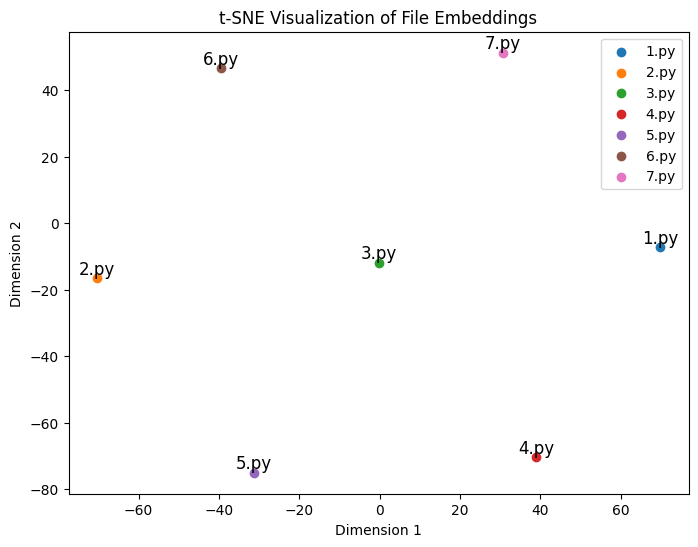

In [21]:
file_names, similarity_matrix = compute_pairwise_similarity(all_embeddings)
print("Pairwise Similarity Matrix:")
print(similarity_matrix.to_string(float_format=lambda x: f"{x:.3f}"))
# Plot visualization
plot_fn = plot_tsne
output = plot_fn(all_embeddings, file_names, "cohere")

In [22]:
output

array([[ 69.915436  ,  -7.216713  ],
       [-70.4073    , -16.618893  ],
       [ -0.23242034, -11.9165325 ],
       [ 38.937275  , -70.44935   ],
       [-31.260378  , -75.11669   ],
       [-39.41116   ,  46.610588  ],
       [ 30.718475  ,  51.335438  ]], dtype=float32)

In [26]:
x = output[:, 0]
y = output[:, 1]
x, y

(array([ 69.915436  , -70.4073    ,  -0.23242034,  38.937275  ,
        -31.260378  , -39.41116   ,  30.718475  ], dtype=float32),
 array([ -7.216713 , -16.618893 , -11.9165325, -70.44935  , -75.11669  ,
         46.610588 ,  51.335438 ], dtype=float32))

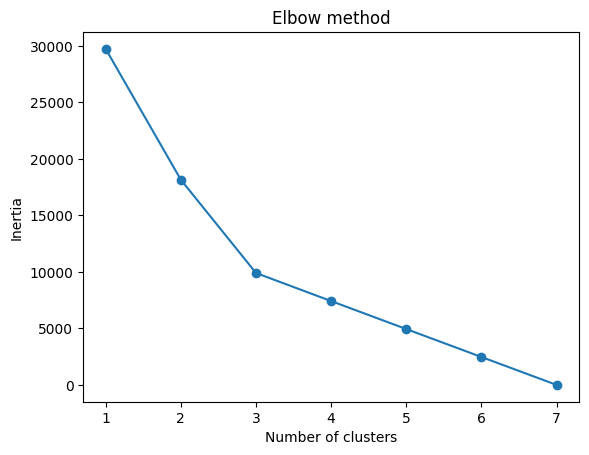

In [29]:
from sklearn.cluster import KMeans

embeddings2d = output
data = list(zip(x, y))
inertias = []

for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,8), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## As shown in the plots the Elbow point (number of clusters) is 3

In [30]:
flatten_xy = list(zip(x, y))
flatten_xy

[(np.float32(69.915436), np.float32(-7.216713)),
 (np.float32(-70.4073), np.float32(-16.618893)),
 (np.float32(-0.23242034), np.float32(-11.9165325)),
 (np.float32(38.937275), np.float32(-70.44935)),
 (np.float32(-31.260378), np.float32(-75.11669)),
 (np.float32(-39.41116), np.float32(46.610588)),
 (np.float32(30.718475), np.float32(51.335438))]

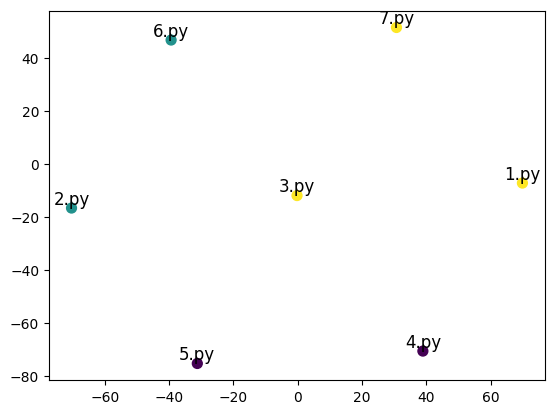

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(flatten_xy)
y_kmeans = kmeans.predict(flatten_xy)
plt.scatter(x, y, c=y_kmeans, s=50, cmap='viridis')
for i, file_name in enumerate(file_names):
        plt.text(
            x[i], 
            y[i], 
            file_name, 
            fontsize=12,  # Increased from 9
            ha='center', 
            va='bottom'
        )

## Code file 1, 3, and 7 clustered together. 6, 2 clustered together. and 4 and 5 are clustered together. 